Best parameters found:  {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 20}
Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


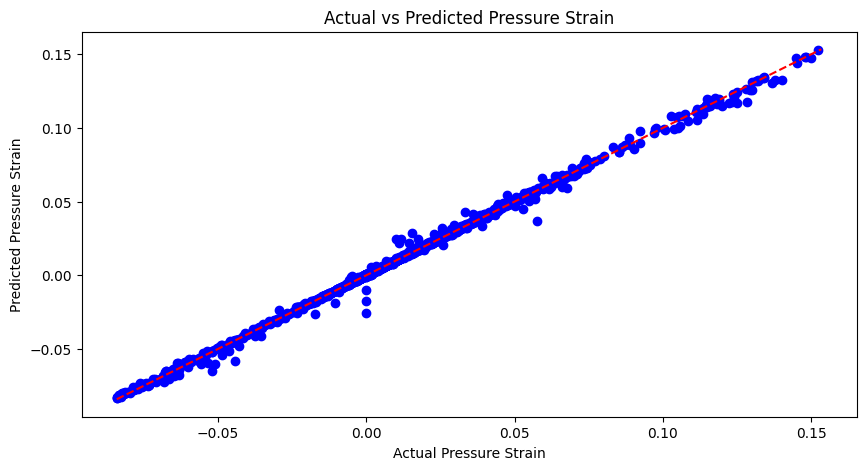

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_grid = {
    'rf__n_estimators': [100],  # Reduced number for speed
    'rf__max_depth': [10, 20],  # Fewer options
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Randomized Search with fewer iterations and less cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model found from the RandomizedSearch
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Actual Pressure Strain': y_test,
    'Predicted Pressure Strain': y_pred
})
results_df.to_csv('model_results.csv', index=False)


Best parameters found:  {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 20}
Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


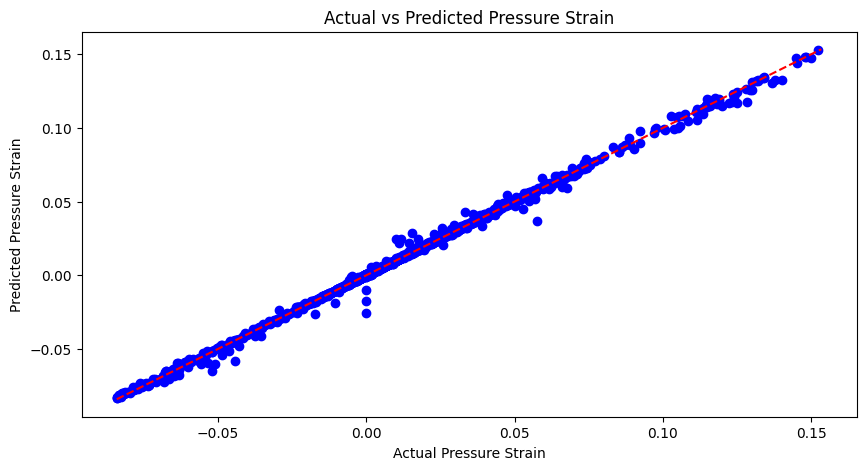

['final_model.joblib']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_grid = {
    'rf__n_estimators': [100],  # Reduced number for speed
    'rf__max_depth': [10, 20],  # Fewer options
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Randomized Search with fewer iterations and less cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model found from the RandomizedSearch
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Actual Pressure Strain': y_test,
    'Predicted Pressure Strain': y_pred
})
results_df.to_csv('model_results.csv', index=False)

# Save the model
joblib.dump(best_model, 'final_model.joblib')


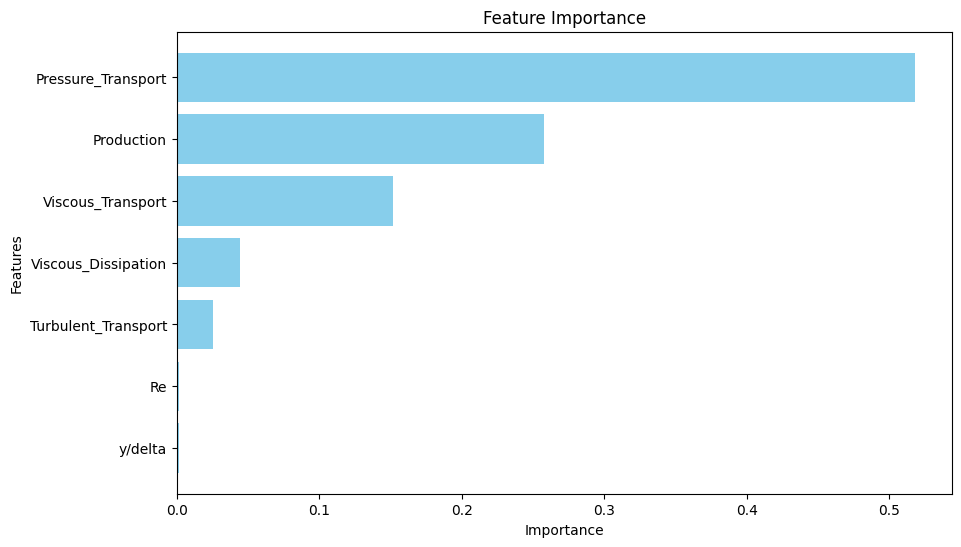

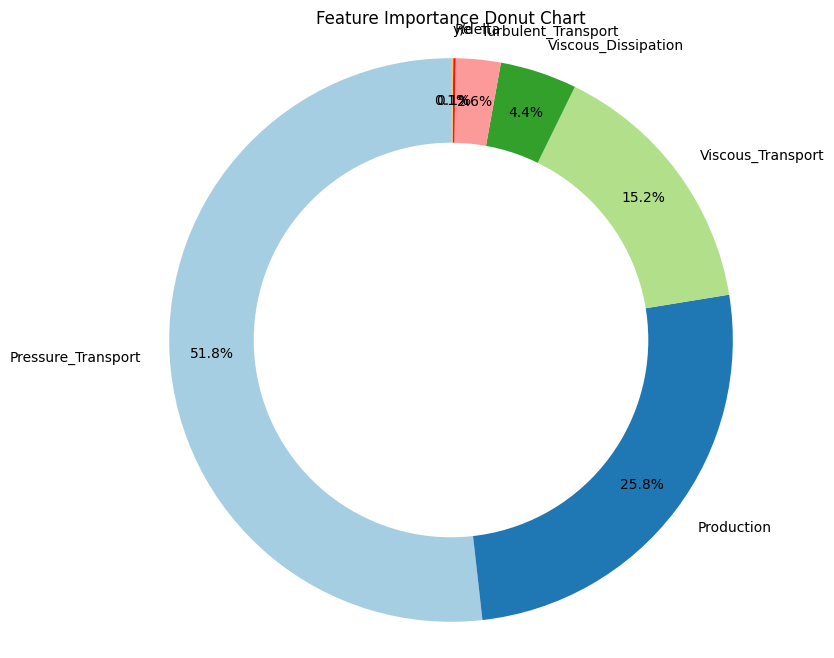

In [3]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np

# Load the model
model = joblib.load('final_model.joblib')

# Assuming 'X' is loaded or available from previous code, and it contains the correct feature names
feature_names = ['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
                 'Pressure_Transport', 'Viscous_Dissipation', 'Re']

# Get feature importances from the model (assuming the model is a fitted RandomForest)
importances = model.named_steps['rf'].feature_importances_

# Create a DataFrame for better visualization and manipulation
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

# Plotting a donut graph of feature importances
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(features_df['Importance'], labels=features_df['Feature'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired(np.arange(len(importances))))

# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Importance Donut Chart')
plt.show()


Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


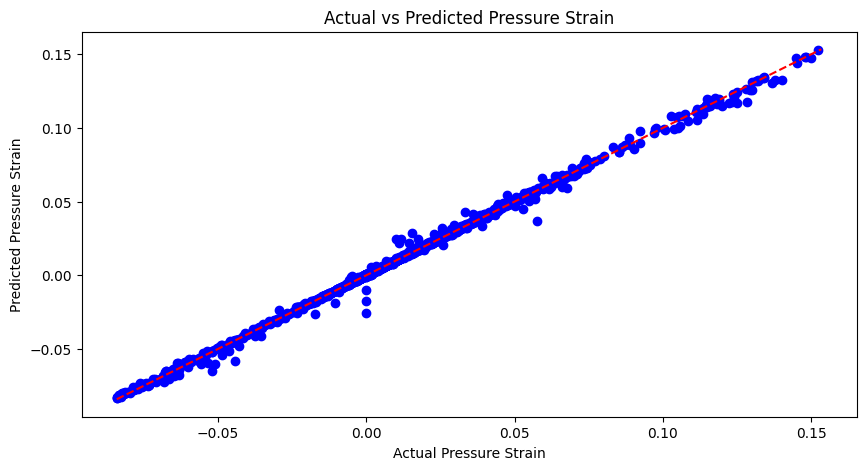

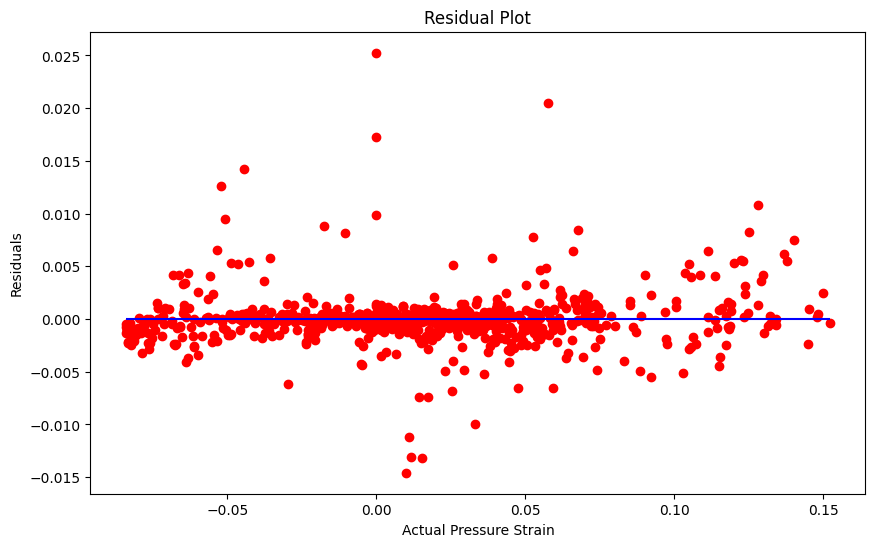

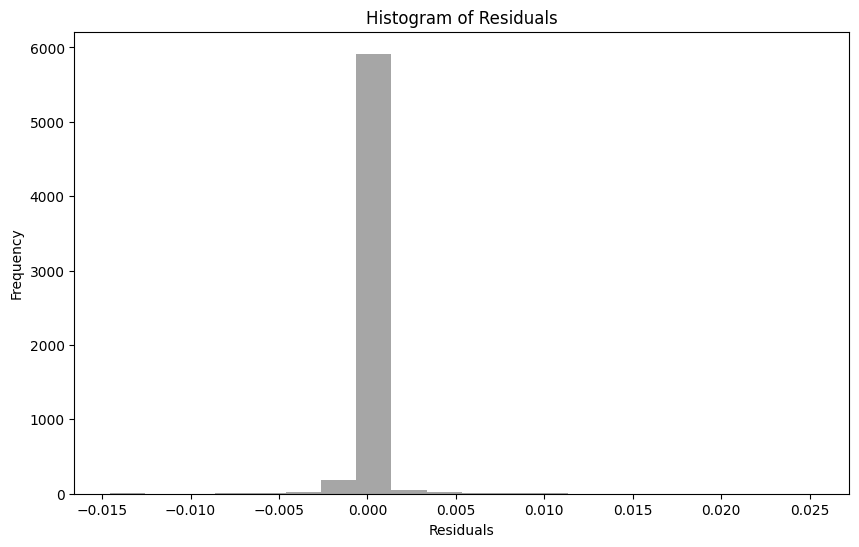

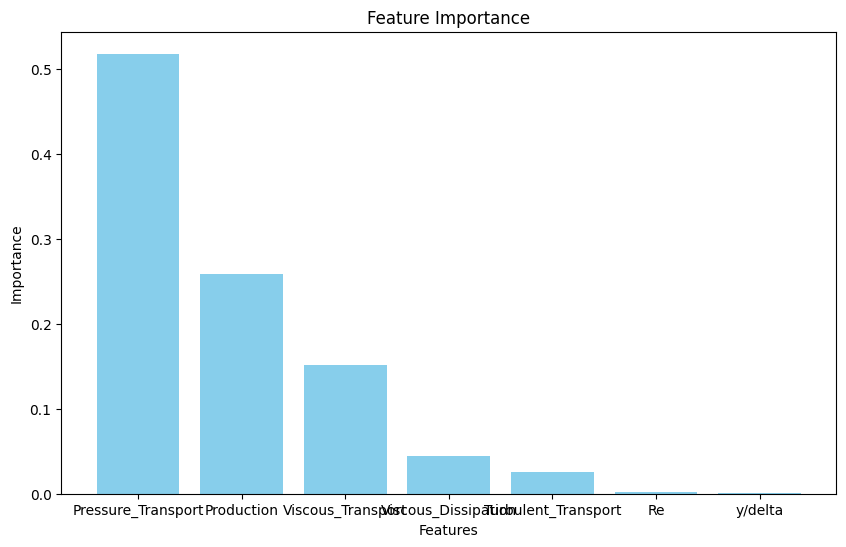

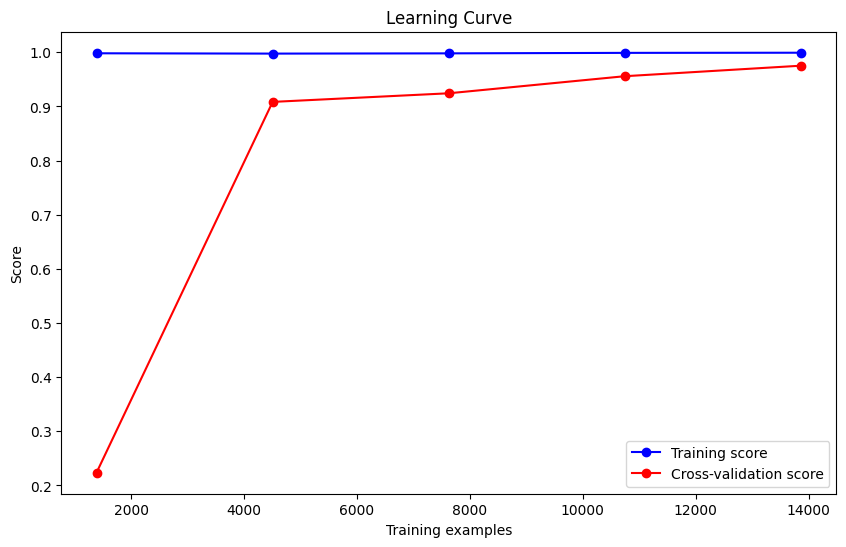

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Load the model
model = joblib.load('final_model.joblib')

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data for evaluation and analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='blue')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='grey', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Feature Importance Analysis
feature_names = X.columns.tolist()
importances = model.named_steps['rf'].feature_importances_
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1, cv=3, train_sizes=np.linspace(.1, 1.0, 5))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


Data contains NaN values. Handling them...
Accuracy (%): 99.00%


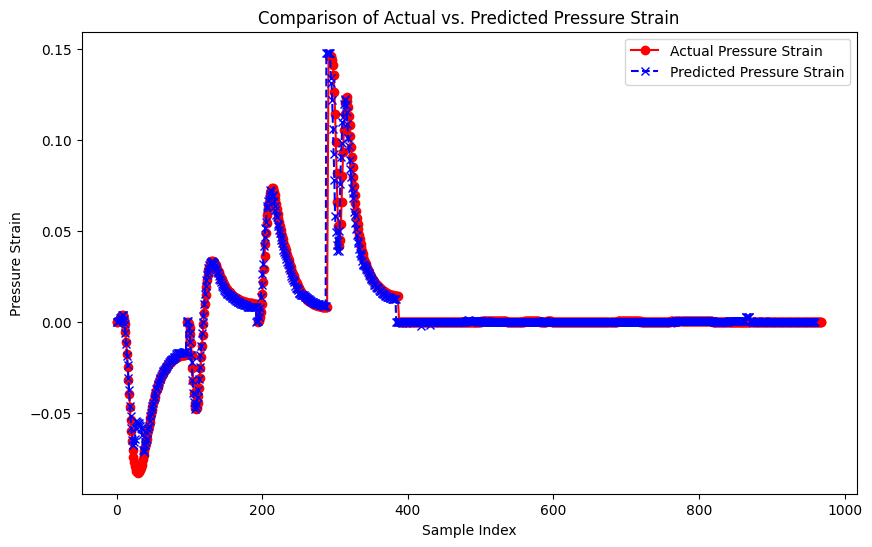

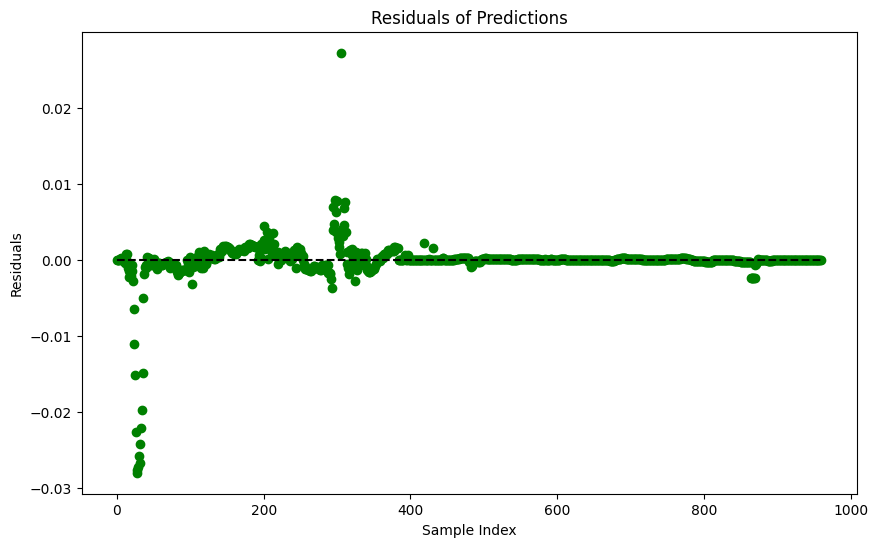

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import r2_score

# Load the model
model = joblib.load('final_model.joblib')

# Load the new Excel data
file_path = 'testing.xlsx'  # Ensure this path is correct
new_data = pd.read_excel(file_path)

# Assuming columns to drop are named 'FileType' and 'Dataset'
# Check if these columns are present and drop them
if 'FileType' in new_data.columns:
    new_data.drop('FileType', axis=1, inplace=True)
if 'Dataset' in new_data.columns:
    new_data.drop('Dataset', axis=1, inplace=True)

# Check for NaN values and handle them
if new_data.isnull().any().any():
    print("Data contains NaN values. Handling them...")
    # Drop rows where target is NaN, assuming 'Pressure_Strain' is the target
    new_data.dropna(subset=['Pressure_Strain'], inplace=True)
    # Fill NaNs in features with the mean (or choose another method)
    new_data.fillna(new_data.mean(), inplace=True)

# Assuming the dataset includes a target column named 'Pressure_Strain'
X_new = new_data[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
                  'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y_actual = new_data['Pressure_Strain']

# Predict using the loaded model
y_pred = model.predict(X_new)

# Calculate R^2 Score (Coefficient of Determination) for accuracy
r2 = r2_score(y_actual, y_pred)
accuracy_percent = r2 * 100
print(f"Accuracy (%): {accuracy_percent:.2f}%")

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Pressure Strain', color='red', marker='o')
plt.plot(y_pred, label='Predicted Pressure Strain', color='blue', linestyle='--', marker='x')
plt.title('Comparison of Actual vs. Predicted Pressure Strain')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Strain')
plt.legend()
plt.show()

# Residual Plot
residuals = y_actual - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='green')
plt.hlines(y=0, xmin=0, xmax=len(residuals), colors='black', linestyles='--')
plt.title('Residuals of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.show()
